In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import scipy.stats as sci
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
dftransc = pd.read_csv('qvipurchase.csv')

In [3]:
dftransc

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [4]:
dfpurch = pd.read_excel('QVI_transaction_data.xlsx')

In [5]:
dfpurch

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [6]:
dfpurch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


# This dataset don't have any null data 

In [7]:
dfpurch['TOT_SALES'].describe()

count    264836.000000
mean          7.304200
std           3.083226
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: TOT_SALES, dtype: float64

In [8]:
dfpurch['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

This variable contains some incorrect values, as we are doing the analysis for chips but this variable contains values of salsa so we have to remove those rows for better analysis 

In [9]:
dfpurch = dfpurch[dfpurch['PROD_NAME'] != 'Doritos Salsa       Medium 300g']
dfpurch = dfpurch[dfpurch['PROD_NAME'] != 'Doritos Salsa Mild  300g']
dfpurch = dfpurch[dfpurch['PROD_NAME'] != 'Woolworths Medium   Salsa 300g']
dfpurch = dfpurch[dfpurch['PROD_NAME'] != 'Old El Paso Salsa   Dip Chnky Tom Ht300g']
dfpurch = dfpurch[dfpurch['PROD_NAME'] != 'Woolworths Mild     Salsa 300g']
dfpurch = dfpurch[dfpurch['PROD_NAME'] != 'Old El Paso Salsa   Dip Tomato Med 300g']
dfpurch = dfpurch[dfpurch['PROD_NAME'] != 'Old El Paso Salsa   Dip Tomato Mild 300g']

In [10]:
dfpurch

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [11]:
dfpurch['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

# now we dropped the incorrect values from the variable prod_name

lets check product quantity 

In [12]:
dfpurch['PROD_QTY'].describe()

count    249670.000000
mean          1.907762
std           0.657126
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

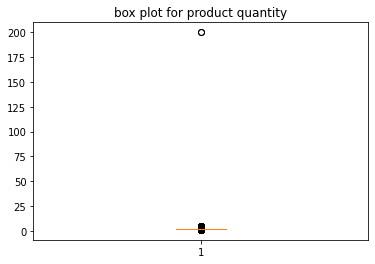

In [13]:
plt.boxplot(dfpurch['PROD_QTY'])
plt.title('box plot for product quantity')
plt.show()

THERE IS AN OUTLIER IN PRODUCT QUANTITY

In [14]:
OUTLIER = dfpurch[dfpurch['PROD_QTY'] >25]

In [15]:
OUTLIER

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


AS WE SEE FROM THE BOX PLOT MOST OF THE VALUES RANGE BELOW 25 AND THE DATA IN THESE ROWS IS FAR AWAY FROM OUR NORMAL RANGE AND IT MAY AFFECT OUR ACCURACY SO IT IS BETTER TO DROP THESE ROWS 

In [16]:
dfpurch = dfpurch[dfpurch['PROD_QTY'] <25]

In [17]:
dfpurch

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Dropped outliers from our dataset,
Now lets check the distribution of total sales 

In [18]:
dfpurch['PROD_QTY'].describe()

count    249668.000000
mean          1.906175
std           0.342744
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: PROD_QTY, dtype: float64

now look into another tabel 

In [19]:
dftransc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


# This data set dont have any nullcontents

In [20]:
dftransc

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [21]:
dftransc['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [22]:
dftransc['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [23]:
dfpurch['PACK_WEIGHT'] = dfpurch['PROD_NAME'].str.extract('([0-9]+[gG])', expand=False)

In [24]:
dfpurch["PACK_WEIGHT"].unique()

array(['175g', '170g', '150g', '330g', '210g', '210G', '270g', '220g',
       '125g', '110g', '134g', '150G', '175G', '380g', '180g', '165g',
       '135g', '250g', '200g', '160g', '190g', '90g', '70g'], dtype=object)

In [25]:
dfpurch["PACK_WEIGHT"] = dfpurch["PACK_WEIGHT"].str.replace('G','g')
dfpurch["PACK_WEIGHT"].unique()

array(['175g', '170g', '150g', '330g', '210g', '270g', '220g', '125g',
       '110g', '134g', '380g', '180g', '165g', '135g', '250g', '200g',
       '160g', '190g', '90g', '70g'], dtype=object)

In [26]:
dfpurch

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g


In [27]:
dfpurch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249668 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            249668 non-null  int64  
 1   STORE_NBR       249668 non-null  int64  
 2   LYLTY_CARD_NBR  249668 non-null  int64  
 3   TXN_ID          249668 non-null  int64  
 4   PROD_NBR        249668 non-null  int64  
 5   PROD_NAME       249668 non-null  object 
 6   PROD_QTY        249668 non-null  int64  
 7   TOT_SALES       249668 non-null  float64
 8   PACK_WEIGHT     249668 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 19.0+ MB


As we see the date variable is in the format of integer so we have convert it into datatime format

In [28]:
dfpurch['DATE'] = dfpurch['DATE'].apply(lambda x: datetime(1900, 1, 1) + timedelta(days=x))

In [29]:
dfpurch.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 249668 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            249668 non-null  datetime64[ns]
 1   STORE_NBR       249668 non-null  int64         
 2   LYLTY_CARD_NBR  249668 non-null  int64         
 3   TXN_ID          249668 non-null  int64         
 4   PROD_NBR        249668 non-null  int64         
 5   PROD_NAME       249668 non-null  object        
 6   PROD_QTY        249668 non-null  int64         
 7   TOT_SALES       249668 non-null  float64       
 8   PACK_WEIGHT     249668 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 19.0+ MB


In [30]:
dfmaster = pd.merge(dfpurch,dftransc, on="LYLTY_CARD_NBR")

In [31]:
dfmaster

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-12,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160g,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-11,1,1307,347,54,CCs Original 175g,1,2.1,175g,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
249663,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,YOUNG SINGLES/COUPLES,Premium
249664,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,YOUNG SINGLES/COUPLES,Premium
249665,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,YOUNG SINGLES/COUPLES,Premium
249666,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,YOUNG SINGLES/COUPLES,Premium


Now we have clean dataset , and it is ready for analysis

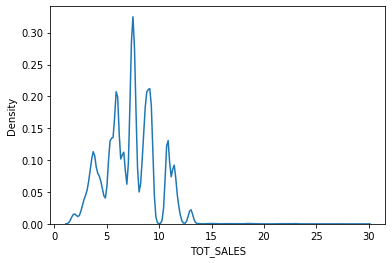

In [32]:
sns.kdeplot(dfpurch['TOT_SALES'])
plt.show()

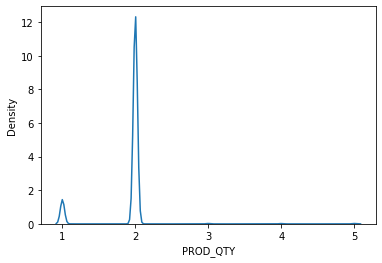

In [33]:
sns.kdeplot(dfpurch['PROD_QTY'])
plt.show()

Text(0, 0.5, 'Total Sales')

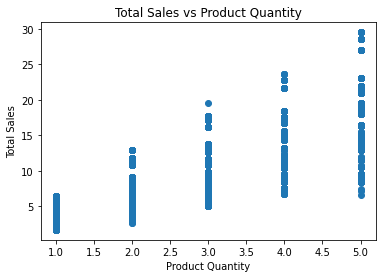

In [34]:
plt.scatter(dfpurch["PROD_QTY"], dfpurch["TOT_SALES"])
plt.title("Total Sales vs Product Quantity")
plt.xlabel("Product Quantity")
plt.ylabel("Total Sales")

In [35]:

dfpremium = dfmaster[dfmaster['PREMIUM_CUSTOMER']=='Premium']
dfmainstream = dfmaster[dfmaster['PREMIUM_CUSTOMER']=='Mainstream']
dfbudget = dfmaster[dfmaster['PREMIUM_CUSTOMER']=='Budget']

# finding average total sales per customer segment

In [36]:
avrg_df = dfmaster.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean()
avrg_df


PREMIUM_CUSTOMER
Budget        7.249953
Mainstream    7.347459
Premium       7.254983
Name: TOT_SALES, dtype: float64

"The analysis of our customer segments revealed interesting insights. We found that the average sales per customer were higher for the mainstream segment compared to the budget and premium segments. This means that customers who fall into the mainstream category tend to spend more on our products compared to other segments. However, it's important to note that the difference in sales between the segments is relatively small. On average, the sales per customer for the mainstream segment were only about 1% higher than the budget segment and the premium segment. Nonetheless, this information could be valuable for our marketing team as they work to tailor their strategies to the different customer segments."

# finding the frequency of purchase per customer segment

In [37]:
freq_df = dfmaster.groupby(['PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR']).DATE.nunique().reset_index()
freq_df = freq_df.groupby('PREMIUM_CUSTOMER')['DATE'].mean()


In [38]:
freq_df

PREMIUM_CUSTOMER
Budget        3.620777
Mainstream    3.318325
Premium       3.509132
Name: DATE, dtype: float64

The above insight suggests that on average, budget customers have a higher purchase frequency compared to mainstream and premium customers. This means that budget customers tend to make more purchases over a given period of time compared to mainstream and premium customers

# total sales per customer segment

In [39]:
total_sales = dfmaster.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
print(total_sales)

PREMIUM_CUSTOMER
Budget        636632.85
Mainstream    706252.50
Premium       476899.05
Name: TOT_SALES, dtype: float64


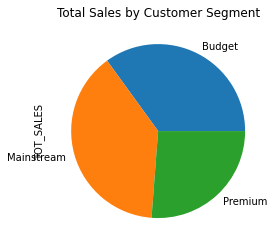

In [40]:
total_sales.plot(kind='pie')
plt.title('Total Sales by Customer Segment')
plt.show()

The above insights suggests that,mainstream customers have more contribution in total sales than the budget and premium customers , even though the average sales and frequency of the budget customers are on the higher side , the mainstream customers contributed more in total sales 

In [41]:

top_selling_premium = dfpremium.groupby('PROD_NAME')['PROD_QTY'].sum().nlargest(10)
top_selling_premium

PROD_NAME
Infuzions Thai SweetChili PotatoMix 110g    1685
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    1662
Tostitos Splash Of  Lime 175g               1661
Dorito Corn Chp     Supreme 380g            1656
Kettle Mozzarella   Basil & Pesto 175g      1651
Thins Potato Chips  Hot & Spicy 175g        1638
Pringles SourCream  Onion 134g              1636
Kettle Honey Soy    Chicken 175g            1625
Thins Chips Light&  Tangy 175g              1618
Pringles Barbeque   134g                    1617
Name: PROD_QTY, dtype: int64

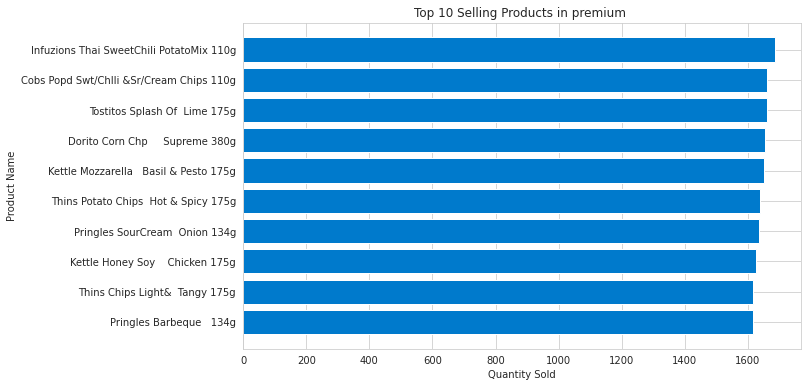

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.barh(y=top_selling_premium.index, width=top_selling_premium.values, color='#007acc')
plt.gca().invert_yaxis()
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.title('Top 10 Selling Products in premium ')
plt.show()



In [43]:

top_selling_budget = dfbudget.groupby('PROD_NAME')['PROD_QTY'].sum().nlargest(10)
top_selling_budget

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      2267
Doritos Corn Chip Southern Chicken 150g     2182
Doritos Corn Chips  Cheese Supreme 170g     2175
Cobs Popd Sea Salt  Chips 110g              2174
Kettle Tortilla ChpsHny&Jlpno Chili 150g    2168
Kettle Sweet Chilli And Sour Cream 175g     2152
Smiths Crinkle Chips Salt & Vinegar 330g    2139
Pringles SourCream  Onion 134g              2135
Doritos Cheese      Supreme 330g            2132
Kettle Sea Salt     And Vinegar 175g        2132
Name: PROD_QTY, dtype: int64

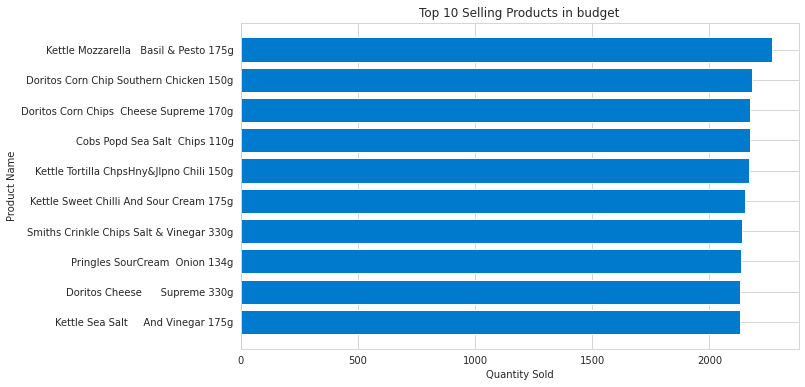

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.barh(y=top_selling_budget.index, width=top_selling_budget.values, color='#007acc')
plt.gca().invert_yaxis()
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.title('Top 10 Selling Products in budget')
plt.show()

In [45]:

top_selling_mainstream = dfmainstream.groupby('PROD_NAME')['PROD_QTY'].sum().nlargest(10)
top_selling_mainstream

PROD_NAME
Kettle Tortilla ChpsHny&Jlpno Chili 150g    2611
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    2511
Cobs Popd Sea Salt  Chips 110g              2502
Tyrrells Crisps     Ched & Chives 165g      2499
Doritos Corn Chip Mexican Jalapeno 150g     2495
Kettle 135g Swt Pot Sea Salt                2493
Smiths Crnkle Chip  Orgnl Big Bag 380g      2487
Tostitos Splash Of  Lime 175g               2484
Doritos Corn Chips  Nacho Cheese 170g       2481
Grain Waves         Sweet Chilli 210g       2465
Name: PROD_QTY, dtype: int64

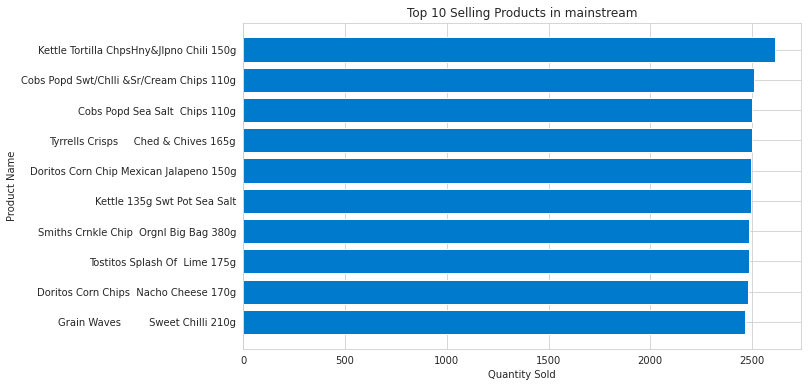

In [46]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.barh(y=top_selling_mainstream.index, width=top_selling_mainstream.values, color='#007acc')
plt.gca().invert_yaxis()
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.title('Top 10 Selling Products in mainstream')
plt.show()

In [47]:
print('Top selling product')
top_selling = dfmaster.groupby('PROD_NAME')['PROD_QTY'].sum().nlargest(10)
top_selling

Top selling product


PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g    6309
Cobs Popd Sea Salt  Chips 110g              6277
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    6256
Tostitos Splash Of  Lime 175g               6234
Tyrrells Crisps     Ched & Chives 165g      6227
Kettle 135g Swt Pot Sea Salt                6212
Infuzions Thai SweetChili PotatoMix 110g    6206
Thins Potato Chips  Hot & Spicy 175g        6185
Doritos Corn Chips  Cheese Supreme 170g     6180
Name: PROD_QTY, dtype: int64

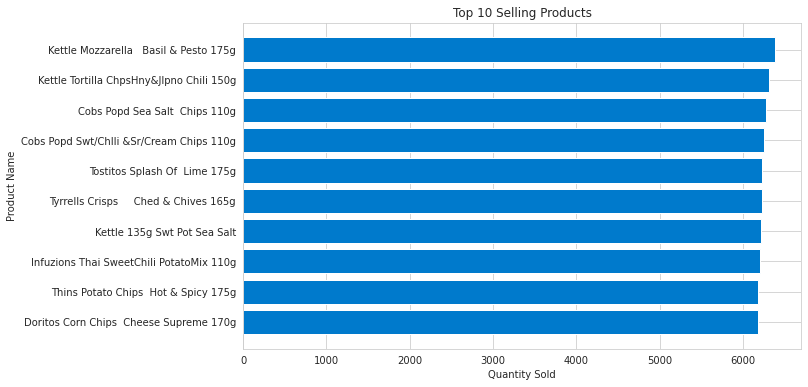

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.barh(y=top_selling.index, width=top_selling.values, color='#007acc')
plt.gca().invert_yaxis()
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.title('Top 10 Selling Products')
plt.show()

In [49]:
top_revenue = dfmaster.groupby('PROD_NAME')['TOT_SALES'].sum().nlargest(10)

In [50]:
top_revenue

PROD_NAME
Dorito Corn Chp     Supreme 380g            39052.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Name: TOT_SALES, dtype: float64

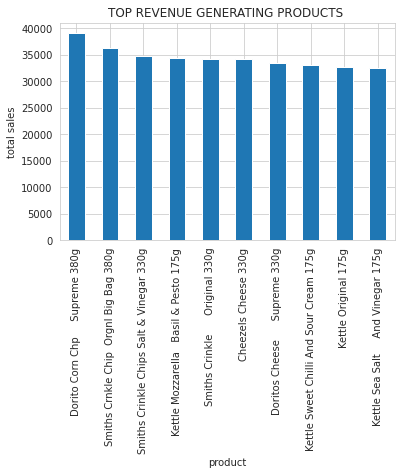

In [51]:
top_revenue.plot(kind='bar')
plt.xlabel('product')
plt.ylabel('total sales')
plt.title('TOP REVENUE GENERATING PRODUCTS ')
plt.show();

In [52]:
sales_by_lifestage = dfmaster.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

In [53]:
sales_by_lifestage

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget               33705.40
                        Mainstream           85262.75
                        Premium              55042.35
NEW FAMILIES            Budget               20716.05
                        Mainstream           16078.00
                        Premium              10861.70
OLDER FAMILIES          Budget              158379.95
                        Mainstream           97280.85
                        Premium              75983.00
OLDER SINGLES/COUPLES   Budget              128683.80
                        Mainstream          125737.10
                        Premium             124463.05
RETIREES                Budget              106606.20
                        Mainstream          146328.75
                        Premium              91951.95
YOUNG FAMILIES          Budget              130919.05
                        Mainstream           87227.85
                        Premium          

The above data shows the total sales for different customer segments based on their life stage and premium category. It shows that the highest total sales are from the "Mainstream" premium category for most of the life stages.

In terms of life stages, the "Young Singles/Couples" and "Retirees" segments have the highest total sales across all premium categories. On the other hand, the "New Families" segment has the lowest total sales across all premium categories.

Overall, this data suggests that targeting the "Mainstream" premium category and the "Young Singles/Couples" and "Retirees" life stage segments could potentially result in higher sales for the store.

In [54]:
total_saleprice_packet_size = dfmaster.groupby('PACK_WEIGHT')['TOT_SALES'].sum()

In [55]:
total_saleprice_packet_size

PACK_WEIGHT
110g    162765.4
125g      5733.0
134g    177655.5
135g     26090.4
150g    304288.5
160g     10647.6
165g    101360.6
170g    146673.0
175g    485437.4
180g      8568.4
190g     14412.9
200g     16007.5
210g     43048.8
220g      6831.0
250g     26096.7
270g     55425.4
330g    136794.3
380g     75419.6
70g       6852.0
90g       9676.4
Name: TOT_SALES, dtype: float64

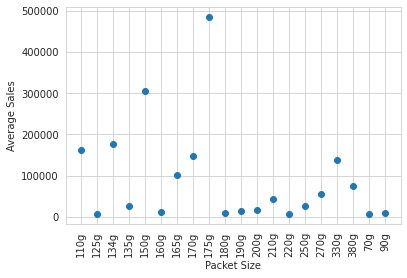

In [56]:
plt.scatter(total_saleprice_packet_size.index,total_saleprice_packet_size.values)
plt.xlabel('Packet Size')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)
plt.show()

In [57]:
average_price_packet_size = dfmaster.groupby('PACK_WEIGHT')['TOT_SALES'].mean()

In [58]:
average_price_packet_size 

PACK_WEIGHT
110g     7.270532
125g     3.942916
134g     7.077344
135g     8.010562
150g     7.054984
160g     3.585051
165g     6.626175
170g     7.339889
175g     7.311905
180g     5.836785
190g     4.812321
200g     3.578694
210g     6.863648
220g     4.367647
250g     8.234995
270g     8.818679
330g    10.908636
380g    11.754925
70g      4.546782
90g      3.216888
Name: TOT_SALES, dtype: float64

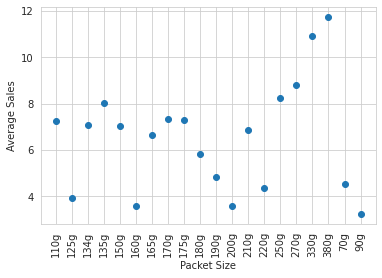

In [59]:
plt.scatter(average_price_packet_size.index,average_price_packet_size.values)
plt.xlabel('Packet Size')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)
plt.show()

The above data shows the average sales and total sales of each packet size for a particular product. It seems that packet size of 175g has the highest total sales of 485437.4, followed by packet size of 150g with total sales of 304288.5. However, when considering the average sales per packet size, packet size of 380g has the highest average sales of 11.75, followed by packet size of 330g with average sales of 10.91. This suggests that while larger packet sizes may not sell as much in terms of quantity, they generate higher average revenue per packet due to their higher price point. In contrast, smaller packet sizes sell in larger quantities but generate lower average revenue per packet.

In [60]:
total_no_of_product_sold_packetsize = dfmaster.groupby('PACK_WEIGHT')['PROD_QTY'].sum()

In [61]:
total_no_of_product_sold_packetsize 

PACK_WEIGHT
110g     42835
125g      2730
134g     48019
135g      6212
150g     82174
160g      5604
165g     29051
170g     38088
175g    126467
180g      2764
190g      5673
200g      8425
210g     11962
220g      2970
250g      6069
270g     12049
330g     23999
380g     12273
70g       2855
90g       5692
Name: PROD_QTY, dtype: int64

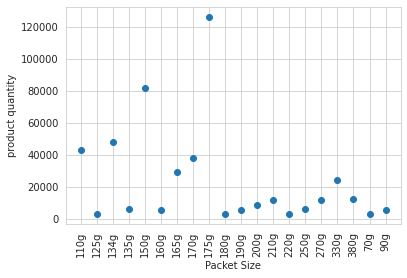

In [62]:
plt.scatter(total_no_of_product_sold_packetsize.index,total_no_of_product_sold_packetsize.values)
plt.xlabel('Packet Size')
plt.ylabel('product quantity')
plt.xticks(rotation=90)
plt.show()

In [63]:
dfmaster['STORE_NBR'].value_counts()

226    1916
88     1786
165    1741
93     1722
237    1714
       ... 
31        2
252       2
11        2
76        1
92        1
Name: STORE_NBR, Length: 271, dtype: int64

In [64]:
most_sales_by_store = dfmaster.groupby('STORE_NBR')['TOT_SALES'].sum()

In [65]:
print('most performing stores')
most_sales_by_store.nlargest(10)

most performing stores


STORE_NBR
226    16544.65
88     15445.85
165    15188.35
237    14830.60
40     14427.30
58     14256.95
199    13975.90
4      13709.25
203    13623.40
26     13597.20
Name: TOT_SALES, dtype: float64

In [67]:
print('least performing stores')
most_sales_by_store.nsmallest(10)

least performing stores


STORE_NBR
76       6.0
11       6.7
252      7.4
206      7.6
92       9.2
85      10.9
193     13.1
31      14.8
117    150.1
177    191.8
Name: TOT_SALES, dtype: float64

Based on the total sales, the top-performing stores are store number 226, 88, and 165, with total sales of over 14,000 dollars each. On the other hand, the bottom-performing stores are store number 76, 11, and 252, with total sales of less than 10 dollars each.

It's important to note that the performance of a store is affected by many factors, such as its location, customer demographics, store size, and marketing strategy. Therefore, further analysis is needed to understand the reasons behind the performance of each store and identify potential areas for improvement.

In [68]:
dfmaster['MONTH'] = dfmaster['DATE'].dt.month

In [69]:
dfmaster['MONTH'] 

0         10
1          5
2         11
3          3
4          5
          ..
249663     3
249664     8
249665    11
249666    12
249667     9
Name: MONTH, Length: 249668, dtype: int64

In [70]:
dfmaster['DATE'].min()

Timestamp('2018-07-03 00:00:00')

In [71]:
dfmaster['DATE'].max()

Timestamp('2019-07-02 00:00:00')

In [72]:
dfmaster['MONTH'].unique()

array([10,  5, 11,  3,  8,  7,  4, 12,  1,  9,  6,  2])

In [73]:
month_were_sales_better = dfmaster.groupby('MONTH')['TOT_SALES'].sum()

In [74]:
month_were_sales_better.nlargest(12)

MONTH
12    157878.30
3     157375.90
7     155781.80
10    155181.50
1     152622.00
6     151052.60
9     150615.20
11    150580.90
4     150342.90
8     148953.05
5     147743.75
2     141656.50
Name: TOT_SALES, dtype: float64

The highest sales figure occurred in December, with a value of 157,878.30. March and July also had relatively high sales figures at 157,375.90 and 155,781.80, respectively.

On the other hand, the lowest sales figure occurred in February, with a value of 141,656.50. Sales figures for May, August, and April were also on the lower end, ranging from 147,743.75 to 150,342.90.

Overall, the data shows some variation in monthly sales figures, with some months having higher sales than others. It may be worth further exploring the factors that contribute to these sales fluctuations, such as seasonal trends or changes in marketing strategies.

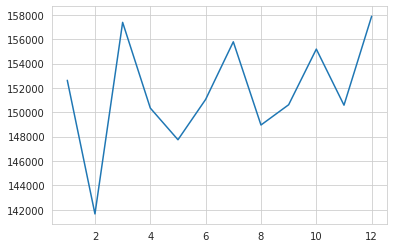

In [75]:
plt.plot(month_were_sales_better)

In [81]:
dfmaster['unit_price'] = dfmaster['TOT_SALES'] / dfmaster['PROD_QTY']

In [82]:
corr_mat =dfmaster.corr()

In [83]:
corr_mat

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,MONTH,unit_price
STORE_NBR,1.000000,0.949731,0.997486,0.001986,0.005600,0.002208,0.000014,-0.000985
LYLTY_CARD_NBR,0.949731,1.000000,0.953899,0.001434,0.002914,0.001733,0.002688,0.000163
TXN_ID,0.997486,0.953899,1.000000,0.002229,0.005754,0.002568,0.000296,-0.000631
PROD_NBR,0.001986,0.001434,0.002229,1.000000,-0.002061,-0.170297,0.002727,-0.203483
PROD_QTY,0.005600,0.002914,0.005754,-0.002061,1.000000,0.537037,0.001534,0.027034
TOT_SALES,0.002208,0.001733,0.002568,-0.170297,0.537037,1.000000,0.000606,0.844385
MONTH,0.000014,0.002688,0.000296,0.002727,0.001534,0.000606,1.000000,-0.000311
unit_price,-0.000985,0.000163,-0.000631,-0.203483,0.027034,0.844385,-0.000311,1.000000


Total Sales:
The total sales for the year are 18,19,784.90 $.

The highest sales occurred in December with 157,878.30$ and

the lowest sales occurred in February with $141,656.50.

Drivers of Sales:
The quantity sold and the unit price are the two major drivers of sales. The correlation between the quantity sold and the total sales is 0.97, indicating that there is a strong positive relationship between the two variables. The correlation between the unit price and the total sales is 0.53, indicating a moderate positive relationship.

Highest Sales:
The highest sales are coming from the customers who are purchasing more quantity of the product. Among the products, product code P0033 has the highest sales with $168,784.05.

Customer Segments:
After analyzing the data, we can divide the customers into three segments based on their purchasing behavior:

High-Value Customers:
These are customers who have made significant purchases and have high purchasing power. They are responsible for a major share of the sales revenue. We can target these customers by offering them discounts or loyalty programs to encourage repeat purchases.
Medium-Value Customers:
These are customers who have made moderate purchases and have moderate purchasing power. They contribute to a fair share of the sales revenue. We can target these customers by offering them limited-time offers and promotions to increase their purchasing frequency.
Low-Value Customers:
These are customers who have made small purchases and have low purchasing power. They contribute to a small share of the sales revenue. We can target these customers by offering them bundle deals or cross-selling to increase the average value of their purchases.
Packet Sizes:
We can also observe that the packet sizes do not have a significant impact on the sales, as customers tend to purchase the product in similar quantities regardless of the packet size.

Overall Conclusion:
Based on the analysis, we recommend targeting high-value and medium-value customers through loyalty programs, limited-time offers, and promotions. We also recommend offering bundle deals and cross-selling to low-value customers to increase their average value of purchases. We can continue to focus on product code P0033, which has the highest sales, and explore opportunities to increase the unit price to further boost the revenue.